<a href="https://colab.research.google.com/github/mbaroja/TFM/blob/code/Agrupacion_jerarquica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering, FeatureAgglomeration
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples


In [47]:
# Carga de los datos a un dataframe y comprobar dimensionalidad

df=pd.read_csv("https://raw.githubusercontent.com/mbaroja/TFM/data/data_cleaned.csv",delimiter=";")
#df=pd.read_csv("https://raw.githubusercontent.com/mbaroja/TFM/data/data_cleaned_without_avgcolumns.csv",delimiter=";")
#df=pd.read_csv("https://raw.githubusercontent.com/mbaroja/TFM/data/data_cleaned_only_avgcolumns.csv",delimiter=";")
df.shape


(133, 110)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Columns: 110 entries, AREA to Obs_01
dtypes: float64(105), int64(1), object(4)
memory usage: 114.4+ KB


**Preprocesado de los datos de entrada**

In [49]:
#Preprocesado de datos ya que los algoritmos requieren datos numéricos para calcular la matriz de afinidad y realizar el clustering

#identificar las columnas que contienen valores de texto en el conjunto de datos
data_text = df.select_dtypes(include='object')
# aplicar la codificación one-hot utilizando el método get_dummies de Pandas para convertir esas columnas en columnas numéricas
data_encoded = pd.get_dummies(data_text)

In [50]:
#una vez que preprocesados los datos, combinar las columnas numéricas procesadas con el resto del conjunto de datos.
data_numeric = df.select_dtypes(exclude='object')
data_processed = pd.concat([data_numeric, data_encoded], axis=1)

In [51]:
data_processed

,V1,V2,V3,SA1,SA2,SA3,SI0,SI1,SI2,SP1,...,EQUIPO_qmsudmubli,EQUIPO_rflidbinih,EDAD_ijawrgtfuz,EDAD_omygfsbzgq,EDAD_pqgwhrmfdu,EDAD_qmsudmubli,EDAD_vjekcogdhn,GENERO_Femenino,GENERO_Masculino,GENERO_No binario
0,5.0,4.0,4.0,5.0,5.0,5.0,4.0,5.0,5.0,4.0,...,0,0,0,0,1,0,0,0,1,0
1,4.0,5.0,3.0,5.0,5.0,5.0,4.0,5.0,6.0,2.0,...,0,0,0,0,1,0,0,0,1,0
2,5.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,3.0,...,0,0,0,1,0,0,0,1,0,0
3,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,...,0,0,0,0,1,0,0,0,1,0
4,2.0,2.0,2.0,1.0,1.0,1.0,4.0,5.0,5.0,1.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,4.0,4.0,4.0,5.0,4.0,5.0,2.0,4.0,4.0,2.0,...,1,0,0,0,0,1,0,0,0,0
129,2.0,3.0,4.0,5.0,4.0,4.0,3.0,6.0,4.0,1.0,...,1,0,0,0,0,1,0,0,0,0
130,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1,0,0,0,0,1,0,0,0,0
131,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,1,0,0,0,0,1,0,0,0,0


In [52]:
#Crear una matriz de características (feature matrix) a partir de los datos:
X = data_processed.values

In [53]:
# Crea una instancia del algoritmo de agrupación jerárquica AgglomerativeClustering
modelAC = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='ward')
clustersAC=modelAC.fit_predict(X)

In [54]:
clustersAC

array([4, 4, 4, 2, 5, 2, 4, 2, 4, 4, 4, 6, 6, 1, 4, 4, 4, 6, 4, 4, 3, 2,
       3, 4, 4, 3, 4, 5, 2, 4, 1, 4, 4, 0, 0, 3, 4, 0, 2, 5, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 3, 4, 4, 2, 4, 3, 0, 4, 4, 4, 4, 1, 0, 4, 3, 4, 4,
       4, 3, 6, 2, 2, 4, 0, 1, 4, 4, 4, 5, 4, 2, 2, 5, 2, 3, 3, 5, 4, 3,
       4, 4, 2, 2, 5, 4, 2, 4, 2, 2, 3, 4, 5, 5, 4, 5, 4, 2, 5, 3, 3, 4,
       4, 3, 2, 2, 2, 4, 2, 2, 3, 2, 2, 2, 4, 2, 2, 4, 4, 3, 4, 3, 1, 4,
       4])

In [55]:

# Obtén las etiquetas de los clusteres asignados a cada fila
etiquetas = modelAC.labels_

# Agrega las etiquetas al DataFrame original
data_processed['Cluster'] = etiquetas

data_processed.to_csv

# Muestra los resultados
print(data_processed.head())

    V1   V2   V3  SA1  SA2  SA3  SI0  SI1  SI2  SP1  ...  EQUIPO_rflidbinih  \
0  5.0  4.0  4.0  5.0  5.0  5.0  4.0  5.0  5.0  4.0  ...                  0   
1  4.0  5.0  3.0  5.0  5.0  5.0  4.0  5.0  6.0  2.0  ...                  0   
2  5.0  4.0  5.0  4.0  4.0  4.0  4.0  5.0  5.0  3.0  ...                  0   
3  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  5.0  4.0  ...                  0   
4  2.0  2.0  2.0  1.0  1.0  1.0  4.0  5.0  5.0  1.0  ...                  0   

   EDAD_ijawrgtfuz  EDAD_omygfsbzgq  EDAD_pqgwhrmfdu  EDAD_qmsudmubli  \
0                0                0                1                0   
1                0                0                1                0   
2                0                1                0                0   
3                0                0                1                0   
4                0                0                1                0   

   EDAD_vjekcogdhn  GENERO_Femenino  GENERO_Masculino  GENERO_No binario  \
0         

In [56]:
num_features=data_processed.shape[1]
num_features

127

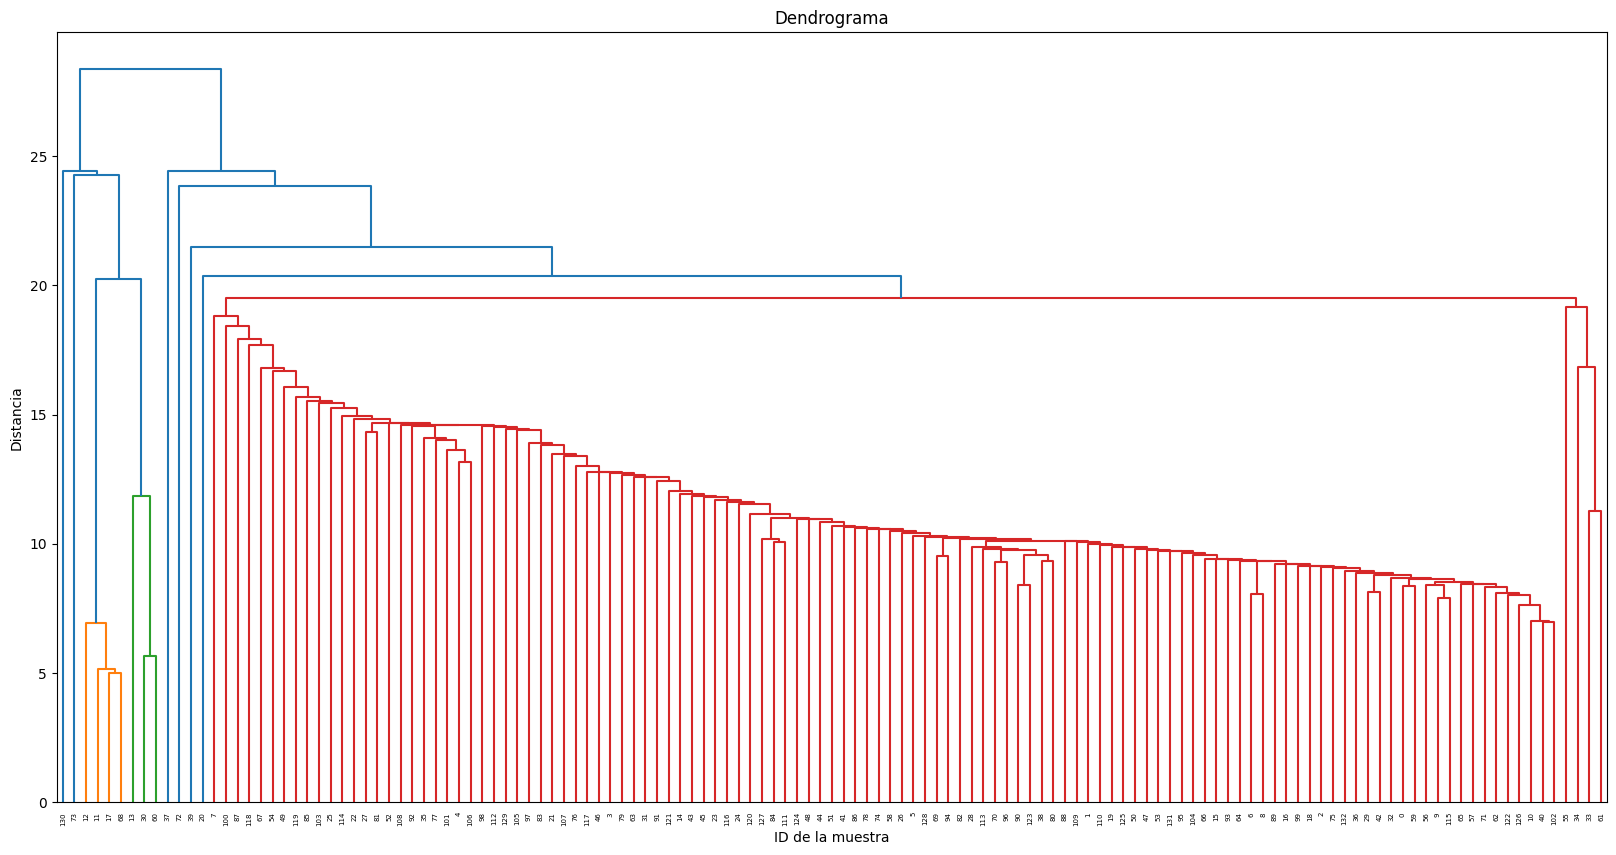

In [57]:
# Calcular la matriz de enlace
linkage_matrix = linkage(data_processed, method='single')

# Mostrar el dendrograma
plt.figure(figsize=(20, 10))
dendrogram(linkage_matrix)

plt.title('Dendrograma')
plt.xlabel('ID de la muestra')
plt.ylabel('Distancia')

plt.show()


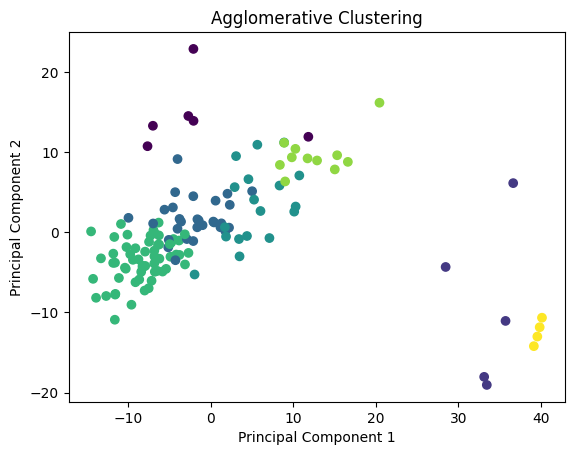

In [58]:
    # Aplicar PCA para reducir a 2 dimensiones
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(data_processed)

    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Agglomerative Clustering')
    plt.show()




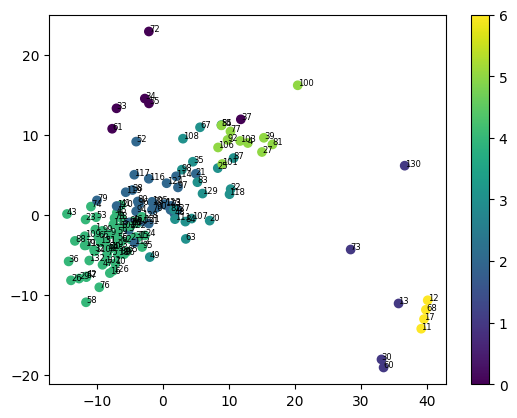

In [59]:
# X_pca[:, 0] son los valores en el eje x

# X_pca[:, 1] son los valores en el eje y

# labels1 son las etiquetas de los grupos

# Crea el gráfico de dispersión con colores según las etiquetas
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=etiquetas)


# Crea una leyenda o mapa de colores
plt.colorbar()

# Etiqueta cada punto con el índice de la fila correspondiente
for i, label in enumerate(etiquetas):
    plt.annotate(i, (X_pca[i, 0], X_pca[i, 1]),size=6)


# Muestra el gráfico
plt.show()

In [60]:
# Aplicar PCA al conjunto de datos
pca = PCA()
pca.fit(data_processed)

# Obtener las componentes principales y su varianza explicada
components = pca.components_
explained_variance = pca.explained_variance_ratio_

# Obtener los índices de los atributos más importantes para cada clúster
important_attributes = []
for cluster in range(modelAC.n_clusters):
    cluster_indices = np.where(etiquetas == cluster)[0]
    cluster_data = data_processed.iloc[cluster_indices]
    cluster_scores = np.mean(cluster_data.dot(components.T), axis=0)
    important_attributes.append(np.argsort(-np.abs(cluster_scores)))

# Nombres de los campos
column_names = data_processed.columns.tolist()

# Imprimir los atributos más importantes por clúster
for cluster, attributes in enumerate(important_attributes):
    print(f"Cluster {cluster}:" )
    for attribute in attributes[:7]:  # Mostrar los 5 atributos más importantes
        attribute_name = column_names[attribute]
        attribute_mean = np.mean(data_processed.iloc[np.where(etiquetas == cluster)[0], attribute])
        print(f"- Atributo n. {attribute+1}: {attribute_name} (Media: {attribute_mean})")



Cluster 0:
- Atributo n. 1: V1 (Media: 3.8333333333333335)
- Atributo n. 2: V2 (Media: 3.8333333333333335)
- Atributo n. 4: SA1 (Media: -1.0)
- Atributo n. 3: V3 (Media: 3.5)
- Atributo n. 5: SA2 (Media: -1.0)
- Atributo n. 14: SF2 (Media: -1.0)
- Atributo n. 13: SF1 (Media: -1.0)
Cluster 1:
- Atributo n. 4: SA1 (Media: 3.2)
- Atributo n. 2: V2 (Media: 3.4)
- Atributo n. 5: SA2 (Media: 3.0)
- Atributo n. 13: SF1 (Media: 2.4)
- Atributo n. 14: SF2 (Media: 3.4)
- Atributo n. 10: SP1 (Media: 3.0)
- Atributo n. 7: SI0 (Media: 3.4)
Cluster 2:
- Atributo n. 1: V1 (Media: 3.793103448275862)
- Atributo n. 3: V3 (Media: 3.2413793103448274)
- Atributo n. 4: SA1 (Media: 4.413793103448276)
- Atributo n. 13: SF1 (Media: 3.7241379310344827)
- Atributo n. 5: SA2 (Media: 4.0344827586206895)
- Atributo n. 7: SI0 (Media: 3.9655172413793105)
- Atributo n. 14: SF2 (Media: 3.8620689655172415)
Cluster 3:
- Atributo n. 1: V1 (Media: 4.444444444444445)
- Atributo n. 3: V3 (Media: 3.2777777777777777)
- Atribut

In [61]:
# Calcular el índice de silueta
silhouette_avg = silhouette_score(data_processed, etiquetas)
print(f"Índice de Silueta Promedio: {silhouette_avg}")

Índice de Silueta Promedio: 0.15412736810751584


In [62]:
# Calcular el índice de silueta para cada muestra
silhouette_values = silhouette_samples(data_processed, etiquetas)

# Calcular el índice de silueta individual promedio para cada clúster
cluster_indices = sorted(set(etiquetas))
for cluster_idx in cluster_indices:
    # Obtener las muestras pertenecientes al clúster actual
    cluster_samples = silhouette_values[etiquetas == cluster_idx]
    cluster_avg_silhouette = cluster_samples.mean()
    print(f"Índice de Silueta del Clúster {cluster_idx}: {cluster_avg_silhouette}")

Índice de Silueta del Clúster 0: 0.104804026746534
Índice de Silueta del Clúster 1: 0.15851810862928062
Índice de Silueta del Clúster 2: 0.04069117897080827
Índice de Silueta del Clúster 3: -0.00957117769326622
Índice de Silueta del Clúster 4: 0.22184935633543182
Índice de Silueta del Clúster 5: 0.158077021652598
Índice de Silueta del Clúster 6: 0.7549884111737157


In [63]:
#modelFA=FeatureAgglomeration(n_clusters=5)